In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

# set max cullumns to none
pd.set_option("display.max_columns",None)
# set colwidth high
pd.set_option("display.max_colwidth",100)

Dataset Covid-19: https://ourworldindata.org/covid-cases

Tableau Dashboard: https://public.tableau.com/views/Covid_19Summary/Covid_19?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [3]:
dataset = pd.read_csv('owid-covid-data.csv')
df = dataset.copy()

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253241 entries, 0 to 253240
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    253241 non-null  object 
 1   continent                                   239021 non-null  object 
 2   location                                    253241 non-null  object 
 3   date                                        253241 non-null  object 
 4   total_cases                                 238866 non-null  float64
 5   new_cases                                   238603 non-null  float64
 6   new_cases_smoothed                          237399 non-null  float64
 7   total_deaths                                219285 non-null  float64
 8   new_deaths                                  219197 non-null  float64
 9   new_deaths_smoothed                         218011 non-null  float64
 

#### Sebelum melakukan analisa lebih lanjut setelah melakukan exploratory data analysis terdapat ketidak lengkapan data yang dimiliki pada dataset yang terdapat di laman situs https://ourworldindata.org/covid-cases tidak adanya data umur yang lengkap dan detail untuk setiap ID/Korban hanya terdapat data 'Median' dari total populasi negara tersebut, untuk itu didalam analisa ini dengan terpaksa tidak menganalisa dengan detail untuk faktor 'umur'. untuk itu analisa ini berfokuskan kepada 3 faktor saja cases, death dan vacine.

#### Q1 - What is the probability of dying from COVID infection in France in March 2023 for a 25 years old? Draw the relevant correlation projections

Nilai probabilitas selalu berada antara 0 dan 1, dengan 0 menunjukkan bahwa suatu peristiwa tidak mungkin terjadi dan 1 menunjukkan bahwa peristiwa pasti akan terjadi.

In [5]:
df1 = df[df['location'].isin(['United States','China','France','Germany'])]

In [6]:
df1.duplicated().sum()

0

In [7]:
# total null values
data_null_total = pd.DataFrame(df1.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*df1.isna().sum()/df1.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
handwashing_facilities,4401.000000,100.000000
excess_mortality_cumulative_per_million,3955.000000,89.865940
excess_mortality,3955.000000,89.865940
excess_mortality_cumulative,3955.000000,89.865940
excess_mortality_cumulative_absolute,3955.000000,89.865940
weekly_icu_admissions_per_million,2821.000000,64.099068
weekly_icu_admissions,2821.000000,64.099068
new_tests_per_thousand,2794.000000,63.485571
new_tests,2794.000000,63.485571
total_tests,2673.000000,60.736196


In [8]:
df1x = df1[['location','date','new_cases','new_deaths','median_age','aged_65_older','aged_70_older','icu_patients','hosp_patients','cardiovasc_death_rate',
            'diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','new_vaccinations','people_vaccinated',
            'people_fully_vaccinated','total_cases','total_deaths','gdp_per_capita','human_development_index']]

In [9]:
# mengubah kolom 'date' menjadi tipe datetime
df1x['date'] = pd.to_datetime(df1x['date'])

# mengextract tanggal
df1x['day'] = df1x['date'].dt.day
df1x['month'] = df1x['date'].dt.month
df1x['year'] = df1x['date'].dt.year

C:\Users\sonym\AppData\Local\Temp\ipykernel_14344\4019277931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1x['date'] = pd.to_datetime(df1x['date'])
C:\Users\sonym\AppData\Local\Temp\ipykernel_14344\4019277931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1x['day'] = df1x['date'].dt.day
C:\Users\sonym\AppData\Local\Temp\ipykernel_14344\4019277931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [51]:
df1x.tail()

,location,date,new_cases,new_deaths,median_age,aged_65_older,aged_70_older,icu_patients,hosp_patients,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases,total_deaths,gdp_per_capita,human_development_index,day,month,year
239113,United States,2023-01-23,29122.0,272.0,38.3,15.413,9.732,3828.0,29417.0,151.089,10.79,19.1,24.6,NaN,64004.0,268925617.0,229618283.0,102043388.0,1104578.0,54225.446,0.926,23,1,2023
239114,United States,2023-01-24,53744.0,786.0,38.3,15.413,9.732,3856.0,29042.0,151.089,10.79,19.1,24.6,NaN,11947.0,268927705.0,229619755.0,102097132.0,1105364.0,54225.446,0.926,24,1,2023
239115,United States,2023-01-25,100339.0,1333.0,38.3,15.413,9.732,3734.0,28606.0,151.089,10.79,19.1,24.6,NaN,NaN,NaN,NaN,102197471.0,1106697.0,54225.446,0.926,25,1,2023
239116,United States,2023-01-26,62454.0,845.0,38.3,15.413,9.732,NaN,NaN,151.089,10.79,19.1,24.6,NaN,NaN,NaN,NaN,102259925.0,1107542.0,54225.446,0.926,26,1,2023
239117,United States,2023-01-27,17178.0,92.0,38.3,15.413,9.732,NaN,NaN,151.089,10.79,19.1,24.6,NaN,NaN,NaN,NaN,102277103.0,1107634.0,54225.446,0.926,27,1,2023


In [11]:
df1x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 45632 to 239117
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 4401 non-null   object        
 1   date                     4401 non-null   datetime64[ns]
 2   new_cases                4385 non-null   float64       
 3   new_deaths               4277 non-null   float64       
 4   median_age               4401 non-null   float64       
 5   aged_65_older            4401 non-null   float64       
 6   aged_70_older            4401 non-null   float64       
 7   icu_patients             3015 non-null   float64       
 8   hosp_patients            1971 non-null   float64       
 9   cardiovasc_death_rate    4401 non-null   float64       
 10  diabetes_prevalence      4401 non-null   float64       
 11  female_smokers           4401 non-null   float64       
 12  male_smokers             440

In [12]:
# Memfilter data untuk data covid-19 prancis pada bulan Maret tahun 2020
df_frence32020= df1x[(df1x['location']=='France')
                &(df1x['year']==2020)
                &(df1x['month']==3)]

# Menghitung jumlah total kasus COVID-19
total_cases = df_frence32020["new_cases"].sum()

# Menghitung jumlah total kematian COVID-19
total_deaths = df_frence32020["new_deaths"].sum()

# Menghitung probabilitas kematian COVID-19
probability_20 = total_deaths / total_cases

# Memfilter data untuk data covid-19 prancis pada bulan Maret tahun 2021
df_frence32021= df1x[(df1x['location']=='France')
                &(df1x['year']==2021)
                &(df1x['month']==3)]

# Menghitung jumlah total kasus COVID-19
total_cases = df_frence32021["new_cases"].sum()

# Menghitung jumlah total kematian COVID-19
total_deaths = df_frence32021["new_deaths"].sum()

# Menghitung probabilitas kematian COVID-19
probability_21 = total_deaths / total_cases

# Memfilter data untuk data covid-19 prancis pada bulan Maret tahun 2022
df_frence32022= df1x[(df1x['location']=='France')
                &(df1x['year']==2022)
                &(df1x['month']==3)]

# Menghitung jumlah total kasus COVID-19
total_cases = df_frence32022["new_cases"].sum()

# Menghitung jumlah total kematian COVID-19
total_deaths = df_frence32022["new_deaths"].sum()

# Menghitung probabilitas kematian COVID-19
probability_22 = total_deaths / total_cases

print("Probabilitas kematian COVID-19 di tahun 2020:", probability_20)
print("Probabilitas kematian COVID-19 di tahun 2021:", probability_21)
print("Probabilitas kematian COVID-19 di tahun 2022:", probability_22)

Probabilitas kematian COVID-19 di tahun 2020: 0.06760152698114294
Probabilitas kematian COVID-19 di tahun 2021: 0.010365626578668163
Probabilitas kematian COVID-19 di tahun 2022: 0.0013410468130396719


Kalimat tersebut menyatakan probabilitas (atau kemungkinan) kematian akibat infeksi COVID-19 pada tahun 2020, 2021, dan 2022. Probabilitas dinyatakan dalam bentuk persentase. Probabilitas adalah suatu nilai yang menggambarkan kemungkinan terjadinya suatu peristiwa (dalam hal ini kematian akibat COVID-19). Nilai probabilitas dalam decimal (0-1) menggambarkan presentase kemungkinan terjadinya suatu peristiwa.

Jika diambil dari 1000 orang, maka:

1. Tahun 2020, dengan probabilitas kematian 0.06760152698114294, artinya dari 1000 orang, sekitar *67* orang memiliki kemungkinan terkena kematian akibat COVID-19.
2. Tahun 2021, dengan probabilitas kematian 0.010365626578668163, artinya dari 1000 orang, sekitar *10* orang memiliki kemungkinan terkena kematian akibat COVID-19.
3. Tahun 2022, dengan probabilitas kematian 0.0013410468130396719, artinya dari 1000 orang, sekitar *1* orang memiliki kemungkinan terkena kematian akibat COVID-19.

Perbandingan tersebut menunjukkan bahwa tahun 2020 memiliki probabilitas kematian akibat COVID-19 yang paling tinggi, sementara tahun 2022 memiliki probabilitas kematian yang paling rendah. 

In [13]:
#Memfilter data untuk bulan Maret
df_maret_2021 = df1x[(df1x ['month'] == 3) & (df1x ['year'] == 2021) & (df1x['location']=='France')]
df_maret_2022 = df1x[(df1x ['month'] == 3) & (df1x ['year'] == 2022) & (df1x['location']=='France')]

In [14]:
df_maret_2022.tail()

,location,date,new_cases,new_deaths,median_age,aged_65_older,aged_70_older,icu_patients,hosp_patients,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases,total_deaths,gdp_per_capita,human_development_index,day,month,year
79940,France,2022-03-27,110174.0,41.0,42.0,19.718,13.079,1486.0,20606.0,86.06,4.77,30.1,35.6,NaN,4448.0,54395209.0,52748232.0,25082393.0,141741.0,38605.671,0.901,27,3,2022
79941,France,2022-03-28,29582.0,149.0,42.0,19.718,13.079,1533.0,21073.0,86.06,4.77,30.1,35.6,NaN,33166.0,54396673.0,52751318.0,25111975.0,141890.0,38605.671,0.901,28,3,2022
79942,France,2022-03-29,217480.0,164.0,42.0,19.718,13.079,1538.0,21300.0,86.06,4.77,30.1,35.6,NaN,45227.0,54398127.0,52754604.0,25329455.0,142054.0,38605.671,0.901,29,3,2022
79943,France,2022-03-30,169024.0,149.0,42.0,19.718,13.079,1546.0,21688.0,86.06,4.77,30.1,35.6,NaN,51489.0,54400980.0,52760124.0,25498479.0,142203.0,38605.671,0.901,30,3,2022
79944,France,2022-03-31,169697.0,139.0,42.0,19.718,13.079,1551.0,21922.0,86.06,4.77,30.1,35.6,NaN,43192.0,54402592.0,52763692.0,25668176.0,142342.0,38605.671,0.901,31,3,2022


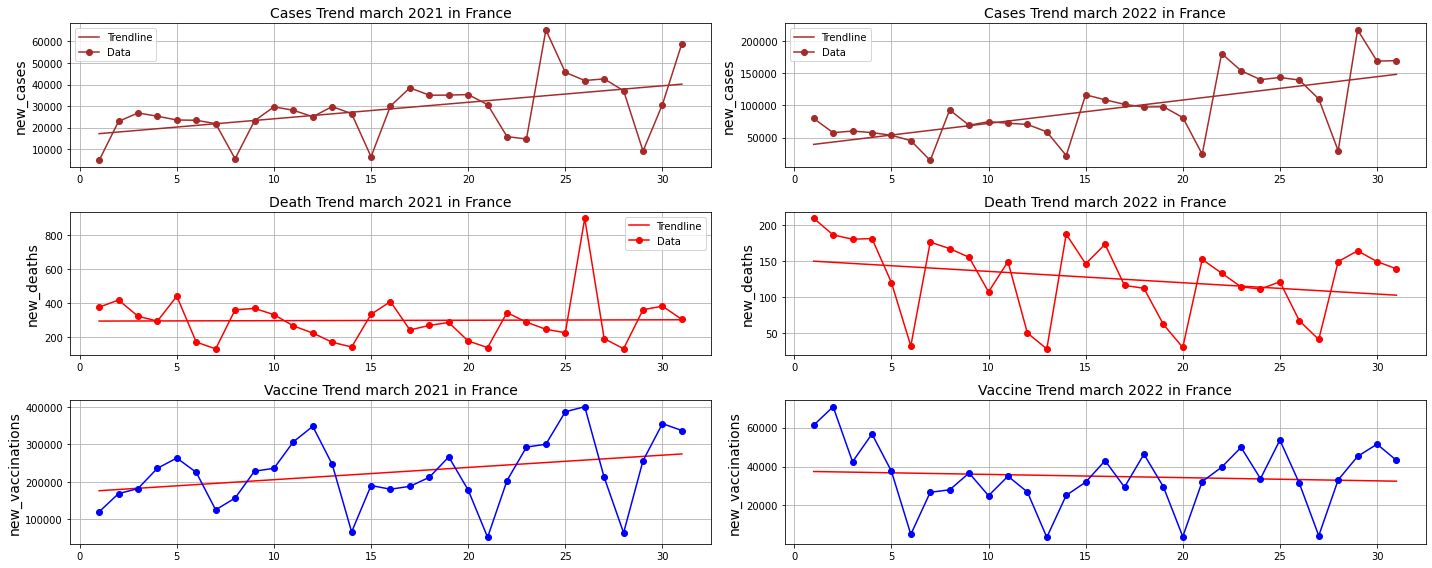

In [37]:
# Plot data cases Trend march 2021
fig, axs = plt.subplots(3, 2, figsize=(20, 8))

z = np.polyfit(df_maret_2021['day'], df_maret_2021['new_cases'], 1)
p = np.poly1d(z)
axs[0, 0].plot(df_maret_2021['day'], p(df_maret_2021['day']), 'brown', label='Trendline')
axs[0, 0].plot(df_maret_2021['day'], df_maret_2021['new_cases'], color='brown', marker='o', label='Data')
axs[0, 0].set_title('Cases Trend march 2021 in France', fontsize=14)
axs[0, 0].set_ylabel('new_cases', fontsize=14)
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot data cases Trend march 2022
z = np.polyfit(df_maret_2022['day'], df_maret_2022['new_cases'], 1)
p = np.poly1d(z)
axs[0, 1].plot(df_maret_2022['day'], p(df_maret_2022['day']), 'brown', label='Trendline')
axs[0, 1].plot(df_maret_2022['day'], df_maret_2022['new_cases'], color='brown', marker='o', label='Data')
axs[0, 1].set_title('Cases Trend march 2022 in France', fontsize=14)
axs[0, 1].set_ylabel('new_cases', fontsize=14)
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot data Death Trend march 2021
z = np.polyfit(df_maret_2021['day'], df_maret_2021['new_deaths'], 1)
p = np.poly1d(z)
axs[1, 0].plot(df_maret_2021['day'], p(df_maret_2021['day']), 'red', label='Trendline')
axs[1, 0].plot(df_maret_2021['day'], df_maret_2021['new_deaths'], color='red', marker='o', label='Data')
axs[1, 0].set_title('Death Trend march 2021 in France', fontsize=14)
axs[1, 0].set_ylabel('new_deaths', fontsize=14)
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot data Death Trend march 2022
z = np.polyfit(df_maret_2022['day'], df_maret_2022['new_deaths'], 1)
p = np.poly1d(z)
axs[1, 1].plot(df_maret_2022['day'], p(df_maret_2022['day']), 'red', label='Trendline')
axs[1, 1].plot(df_maret_2022['day'], df_maret_2022['new_deaths'], color='red', marker='o')
axs[1, 1].set_title('Death Trend march 2022 in France', fontsize=14)
axs[1, 1].set_ylabel('new_deaths', fontsize=14)
axs[1, 1].grid(True)

# Plot data vacine Trend march 2021
z = np.polyfit(df_maret_2021['day'], df_maret_2021['new_vaccinations'], 1)
p = np.poly1d(z)
axs[2, 0].plot(df_maret_2021['day'], p(df_maret_2021['day']), 'red', label='Trendline')
axs[2, 0].plot(df_maret_2021['day'], df_maret_2021['new_vaccinations'], color='blue', marker='o')
axs[2, 0].set_title('Vaccine Trend march 2021 in France', fontsize=14)
axs[2, 0].set_ylabel('new_vaccinations', fontsize=14)
axs[2, 0].grid(True)

# Plot data vacine Trend march 2022
z = np.polyfit(df_maret_2022['day'], df_maret_2022['new_vaccinations'], 1)
p = np.poly1d(z)
axs[2, 1].plot(df_maret_2022['day'], p(df_maret_2022['day']), 'red', label='Trendline')
axs[2, 1].plot(df_maret_2022['day'], df_maret_2022['new_vaccinations'], color='blue', marker='o')
axs[2, 1].set_title('Vaccine Trend march 2022 in France', fontsize=14)
axs[2, 1].set_ylabel('new_vaccinations', fontsize=14)
axs[2, 1].grid(True)

plt.tight_layout()
plt.show()


### Q2-What is the correlation between the number of deaths with age for the US, China, France and Germany?

In [24]:
df1x.sample(6)

,location,date,new_cases,new_deaths,median_age,aged_65_older,aged_70_older,icu_patients,hosp_patients,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases,total_deaths,gdp_per_capita,human_development_index,day,month,year
84843,Germany,2021-02-11,10237.0,666.0,46.6,21.453,15.957,3675.0,NaN,156.139,8.31,28.2,33.1,NaN,144835.0,2606502.0,1332613.0,2310233.0,63635.0,45229.245,0.947,11,2,2021
79884,France,2022-01-30,249448.0,127.0,42.0,19.718,13.079,3641.0,31536.0,86.060,4.77,30.1,35.6,NaN,58223.0,54110296.0,51616339.0,19110023.0,130650.0,38605.671,0.901,30,1,2022
45812,China,2020-07-20,23.0,0.0,38.7,10.641,5.929,NaN,NaN,261.899,9.74,1.9,48.4,NaN,NaN,NaN,NaN,87372.0,4706.0,15308.712,0.761,20,7,2020
85503,Germany,2022-12-03,0.0,0.0,46.6,21.453,15.957,926.0,NaN,156.139,8.31,28.2,33.1,NaN,10988.0,64856051.0,63541133.0,36530020.0,158109.0,45229.245,0.947,3,12,2022
239055,United States,2022-11-26,3262.0,13.0,38.3,15.413,9.732,3037.0,25121.0,151.089,10.79,19.1,24.6,NaN,189832.0,267346152.0,228534957.0,98581519.0,1079515.0,54225.446,0.926,26,11,2022
238664,United States,2021-10-31,34031.0,258.0,38.3,15.413,9.732,12092.0,42513.0,151.089,10.79,19.1,24.6,NaN,440387.0,221864694.0,197254907.0,46053296.0,745007.0,54225.446,0.926,31,10,2021


In [25]:
df2x = df1x.drop(columns=['handwashing_facilities', 'diabetes_prevalence', 'female_smokers','male_smokers','people_vaccinated',
                          'people_fully_vaccinated','day','total_deaths','human_development_index','total_cases',
                          'cardiovasc_death_rate','year','month'])
df2x.head()

,location,date,new_cases,new_deaths,median_age,aged_65_older,aged_70_older,icu_patients,hosp_patients,new_vaccinations,gdp_per_capita
45632,China,2020-01-22,NaN,NaN,38.7,10.641,5.929,NaN,NaN,NaN,15308.712
45633,China,2020-01-23,92.0,1.0,38.7,10.641,5.929,NaN,NaN,NaN,15308.712
45634,China,2020-01-24,277.0,8.0,38.7,10.641,5.929,NaN,NaN,NaN,15308.712
45635,China,2020-01-25,483.0,16.0,38.7,10.641,5.929,NaN,NaN,NaN,15308.712
45636,China,2020-01-26,663.0,14.0,38.7,10.641,5.929,NaN,NaN,NaN,15308.712


In [26]:
df2x['new_cases'] = df2x['new_cases'].fillna(0).astype(int)
df2x['new_deaths'] = df2x['new_deaths'].fillna(0).astype(int)
df2x['median_age'] = df2x['median_age'].fillna(0).astype(int)
df2x['aged_65_older'] = df2x['aged_65_older'].fillna(0).astype(int)
df2x['aged_70_older'] = df2x['aged_70_older'].fillna(0).astype(int)
df2x['icu_patients'] = df2x['icu_patients'].fillna(0).astype(int)
df2x['hosp_patients'] = df2x['hosp_patients'].fillna(0).astype(int)
df2x['new_vaccinations'] = df2x['new_vaccinations'].fillna(0).astype(int)
df2x['date'] = df2x['date'].dt.strftime('%Y-%m')

In [27]:
df2x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 45632 to 239117
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          4401 non-null   object 
 1   date              4401 non-null   object 
 2   new_cases         4401 non-null   int32  
 3   new_deaths        4401 non-null   int32  
 4   median_age        4401 non-null   int32  
 5   aged_65_older     4401 non-null   int32  
 6   aged_70_older     4401 non-null   int32  
 7   icu_patients      4401 non-null   int32  
 8   hosp_patients     4401 non-null   int32  
 9   new_vaccinations  4401 non-null   int32  
 10  gdp_per_capita    4401 non-null   float64
dtypes: float64(1), int32(8), object(2)
memory usage: 275.1+ KB


In [28]:
df2x.head()

,location,date,new_cases,new_deaths,median_age,aged_65_older,aged_70_older,icu_patients,hosp_patients,new_vaccinations,gdp_per_capita
45632,China,2020-01,0,0,38,10,5,0,0,0,15308.712
45633,China,2020-01,92,1,38,10,5,0,0,0,15308.712
45634,China,2020-01,277,8,38,10,5,0,0,0,15308.712
45635,China,2020-01,483,16,38,10,5,0,0,0,15308.712
45636,China,2020-01,663,14,38,10,5,0,0,0,15308.712


In [29]:
df2x_grouped = df2x.groupby(['location','date']).agg({'new_cases':['sum'],
                                                      'new_deaths':['sum'],
                                                      'icu_patients':['sum'],
                                                      'hosp_patients':['sum'],
                                                      'new_vaccinations':['sum']})

In [30]:
df2x_grouped_reset = df2x_grouped.reset_index()

In [31]:
df2x_grouped_reset.columns = ['Country','date_m','cases','deaths','icu_patients','hosp_patients','vaccinations']
df2x_grouped_reset.sample(7)

,Country,date_m,cases,deaths,icu_patients,hosp_patients,vaccinations
40,France,2020-04,140289,20823,175719,880325,0
61,France,2022-01,9178378,7206,117124,794195,13015752
23,China,2021-12,4043,14,0,0,327357000
111,United States,2020-01,7,0,0,0,0
57,France,2021-09,263713,2244,57703,281165,6997909
24,China,2022-01,4901,16,0,0,165200000
45,France,2020-09,283439,1345,23300,163937,0


In [32]:
df2xx = df2x_grouped_reset

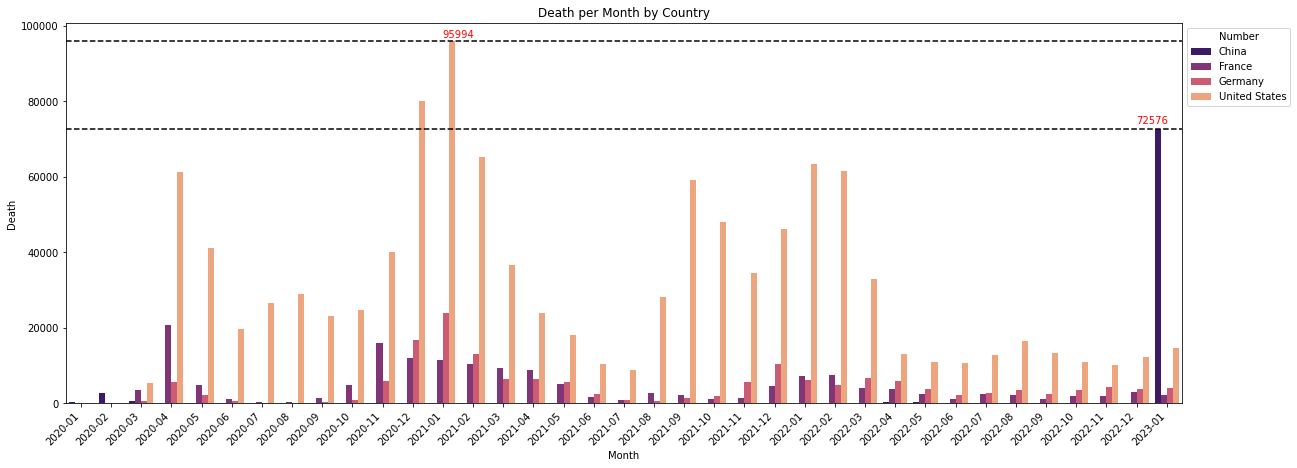

In [38]:
# Create the barplot
plt.figure(figsize=(20,7))
sns.barplot(x='date_m', y='deaths', hue='Country', data=df2xx, palette='magma')

plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Number', bbox_to_anchor = (1, 1))
plt.text(x = 12, y = 97000, s = "95994", color='red')
plt.text(x = 35, y = 74000, s = "72576", color='red')
plt.axhline(72576, color='black', linestyle='--')
plt.axhline(95994, color='black', linestyle='--')


# Add labels and title
plt.xlabel('Month')
plt.ylabel('Death')
plt.title('Death per Month by Country')

# Show the plot
plt.show()

Grafik barplot ini menunjukkan jumlah kematian berdasarkan negara dan bulan. Ada dua negara yang diamati US dan China, dengan jumlah kematian masing-masing sebesar 95994 untuk US tertinggi dalam pandemi dan 72576 untuk China merupakan anomali yang tidak lazim dikarenakan disaat pandemi sudah mulai berakhir namun China melonjak drastis. US dengan total di tanggal 01-2021 memiliki kasus sebesar 6137229 dan china untuk tanggal 01-2023 sebesar 1495172.

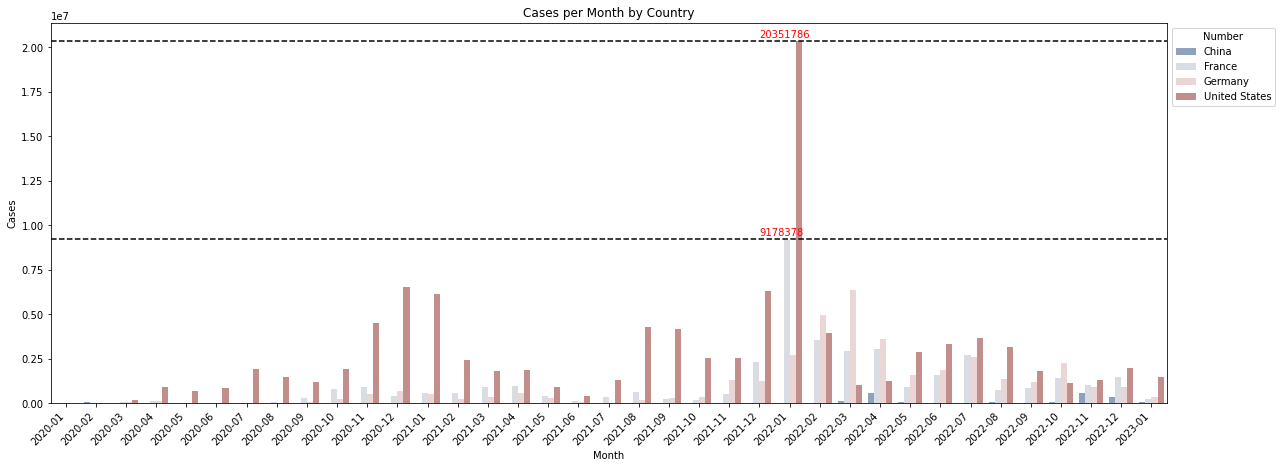

In [39]:
# Create the barplot
plt.figure(figsize=(20,7))
sns.barplot(x='date_m', y='cases', hue='Country', data=df2xx, palette='vlag')

plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Number', bbox_to_anchor = (1, 1))
plt.text(x = 23, y = 20551786, s = "20351786", color='red') #US
plt.text(x = 23, y = 9408378, s = "9178378", color='red') #FRANCE
plt.axhline(20351786, color='black', linestyle='--')
plt.axhline(9198378, color='black', linestyle='--')


# Add labels and title
plt.xlabel('Month')
plt.ylabel('Cases')
plt.title('Cases per Month by Country')

# Show the plot
plt.show()

Amerika mengalami lonjakan kasus yang dimulai pada 11-2021 naik hingga meroket pada tanggal 01-2022 begitupula dengan perancis. angka kematian mengalami trend naik yang serupa dengan angka kematian di bulan 01-2022 sebanyak 63435 (UD) dan France (7206). namun hasil yang jauh lebih baik dimiliki oleh China yang hanya memiliki 4901 cases dan 16 death di tanggal yang sama.

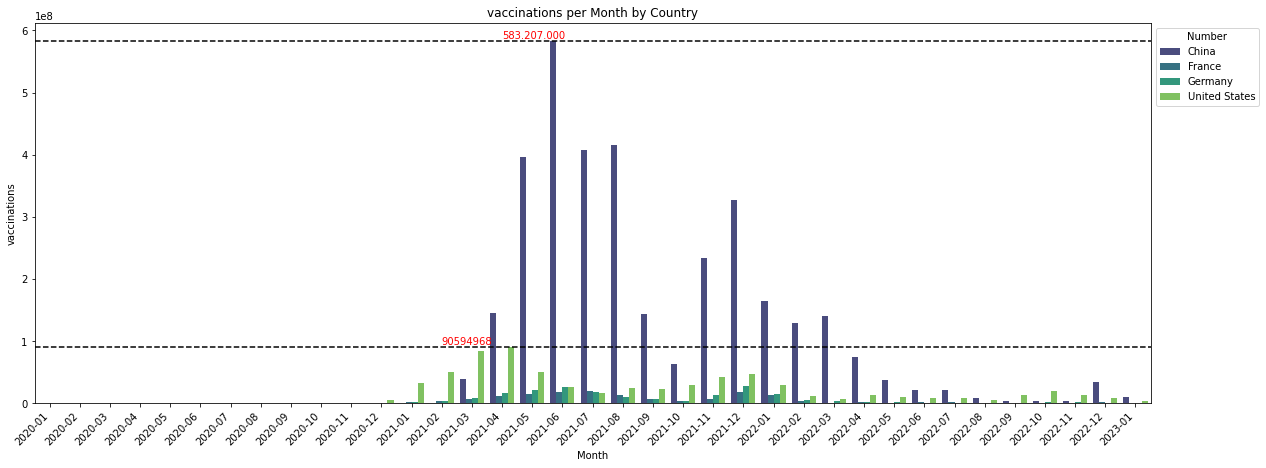

In [40]:
# Create the barplot
plt.figure(figsize=(20,7))
sns.barplot(x='date_m', y='vaccinations', hue='Country', data=df2xx, palette='viridis')

plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Number', bbox_to_anchor = (1, 1))
plt.text(x = 15, y = 587207000, s = "583.207.000", color='red')
plt.text(x = 13, y = 93994968, s = "90594968", color='red')
plt.axhline(583207000, color='black', linestyle='--')
plt.axhline(90594968, color='black', linestyle='--')


# Add labels and title
plt.xlabel('Month')
plt.ylabel('vaccinations')
plt.title('vaccinations per Month by Country')

# Show the plot
plt.show()

Secara keseluruhan US menjadi negara paling terdampak mengalami 2 gelombang covid - 19 di awal tahun 2021 dan awal tahun 2022. China menjadi negara dengan kasus relatif rendah dan stabil dikarenakan china sudah melakukan vaksin dengan jumlah yang sangat besar di pertengahan 2021 ini membuat China dapat menekan pertumbuhan covid namun terdapat anomali pada awal tahun 2023 kematian akibat covid-19 di china meningkat drastis. sedangkan untuk kedua negara Prancis dan German relatif dapat menekan persebaran pandemi dengan baik hanya prancis yang terlihat mengalami lonjakan kasus dan kematian di awal tahun 2021. kesimpulanya adalah dari 4 negara tersebut faktor terbesar penyebab penurunan resiko kematian adalah vaksin. Negara dengan tingkat vaksin yang merata terbukti dapat menekan angkat penyebaran dan angka kematian virus covid-19.

In [49]:
#filtering detail kasus covid - 19 dari 4 negara

df2xx[df2xx['date_m']=='2023-01'] 

,Country,date_m,cases,deaths,icu_patients,hosp_patients,vaccinations
36,China,2023-01,67833,72576,0,0,9964000
73,France,2023-01,214139,2140,32260,542373,639532
110,Germany,2023-01,369606,3976,27458,0,246205
147,United States,2023-01,1495172,14583,115346,904802,3181161
